Deaths  has  263862  entries
Demographics  has  643  entries
Age  has  617  entries
Hospitals  has  552  entries
The keys of the dataframes are: 

Deaths :
length:  263862
Index(['pc11_state_id', 'pc11_district_id', 'date', 'total_cases',
       'total_deaths'],
      dtype='object')
Demographics :
length:  643
Index(['pc11_state_id', 'pc11_district_id', 'pc11_urb_share', 'pc11_slum_pop',
       'pc11_vd_area', 'pc11_td_area', 'pc11_tot_area', 'pc11_pop_dens',
       'pc11r_pca_tot_p', 'pc11u_pca_tot_p', 'pc11_pca_tot_p',
       'pc11r_pca_tot_m', 'pc11u_pca_tot_m', 'pc11_pca_tot_m',
       'pc11r_pca_tot_f', 'pc11u_pca_tot_f', 'pc11_pca_tot_f',
       'pc11r_pca_p_lit', 'pc11u_pca_p_lit', 'pc11_pca_p_lit',
       'pc11r_pca_m_lit', 'pc11u_pca_m_lit', 'pc11_pca_m_lit',
       'pc11r_pca_f_lit', 'pc11u_pca_f_lit', 'pc11_pca_f_lit',
       'pc11r_pca_p_sc', 'pc11u_pca_p_sc', 'pc11_pca_p_sc', 'pc11r_pca_m_sc',
       'pc11u_pca_m_sc', 'pc11_pca_m_sc', 'pc11r_pca_f_sc', 'pc11u_pca_f_sc',
 

/var/folders/qp/db6jtr4x2_l62jhkr9rd2cvm0000gn/T/ipykernel_71607/2328574513.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champion.iloc[89:98]['total_cases'] = total_cases_nd/len(ourrange)
/var/folders/qp/db6jtr4x2_l62jhkr9rd2cvm0000gn/T/ipykernel_71607/2328574513.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  champion.iloc[89:98]['total_deaths'] = total_deaths_nd/len(ourrange)
/var/folders/qp/db6jtr4x2_l62jhkr9rd2cvm0000gn/T/ipykernel_71607/2328574513.py:16: SettingWithCopyWarning: 
A value is

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB
0 values are missing.


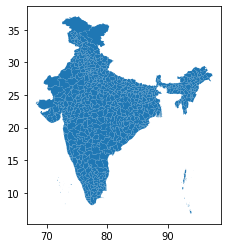

0 censuscode
1 Districtname
2 pc11_state_name
3 State id
4 Literacy
5 population density
6 slum population
7 Urban population share
8 population
9 pc11_tot_area
10 Beds (IC)
11 Beds (total)
12 Care facilities (hospitals/clinics)
13 average_age
14 total_cases
15 total_deaths
16 deaths per 100.000
17 cases per 100.000
18 population density2
0 Literacy
1 population density
2 slum population
3 Urban population share
4 population
5 pc11_tot_area
6 Beds (IC)
7 Beds (total)
8 Care facilities (hospitals/clinics)
9 average_age
10 total_cases
11 total_deaths


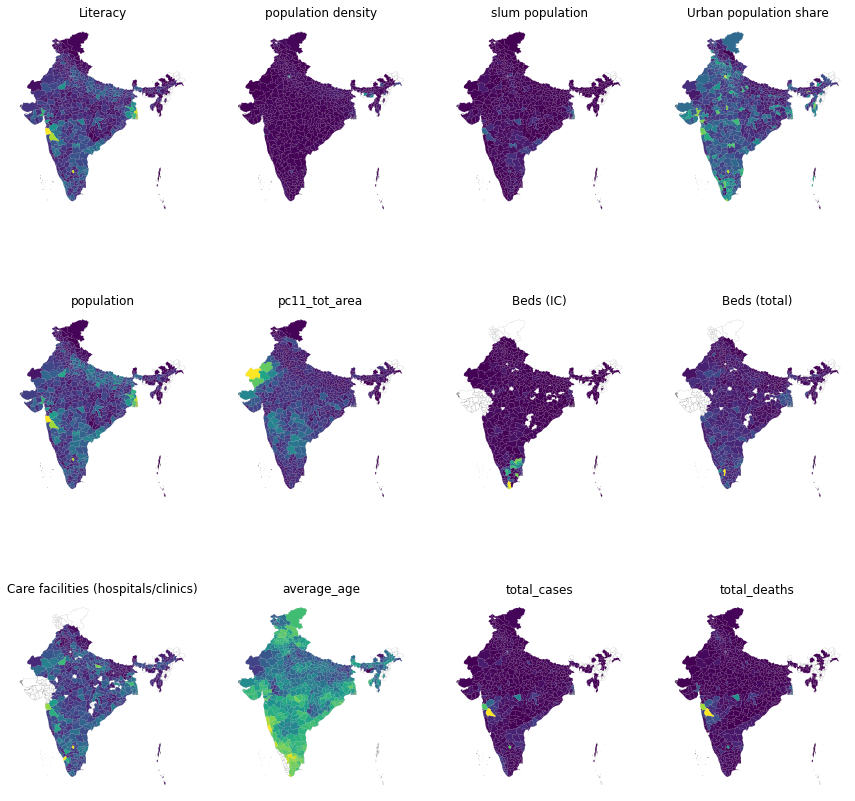

NameError: name 'k' is not defined

NameError: name 'k' is not defined

In [2]:
%run "Dataframes.ipynb"
%run "Map_india.ipynb"

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [2]:
#drops the date and state id columns
ddrop = deaths_frame.drop(['date','pc11_state_id'],axis=1)

#groups by district and sums deaths and cases over the entire period
deaths_total = ddrop.groupby(['censuscode']).sum()

deaths_total.reset_index(inplace = True)

deaths_total.head()

,censuscode,total_cases,total_deaths
0,1,1202840.0,20388.0
1,2,1614414.0,25240.0
2,3,1401315.0,14638.0
3,4,508224.0,9312.0
4,5,517956.0,4809.0


In [3]:
keys_frame = names_frame

In [10]:
ddrop_keys = keys_frame.drop(['pc11_state_id','pc11_state_name'],axis=1)

#drops duplicates
dkeys = ddrop_keys.drop_duplicates(subset=['pc11_district_name']).rename({'pc11_district_id': 'censuscode', 'pc11_district_name': 'district'}, axis=1)

#converts censuscode float to int
dkeys = dkeys.fillna(0).astype({'censuscode': 'int64'})

#sets censuscode as index
#dkeys = dkeys.set_index('censuscode')

dkeys_dict = dkeys.to_dict()

In [13]:
dkeys

,censuscode,district
0,1,kupwara
370,2,badgam
845,3,leh ladakh
958,4,kargil
1085,5,punch
...,...,...
632668,634,yanam
632672,636,mahe
632674,638,nicobars
632870,639,north middle andaman


<AxesSubplot:xlabel='total_deaths', ylabel='Density'>

<AxesSubplot:xlabel='total_cases', ylabel='Density'>

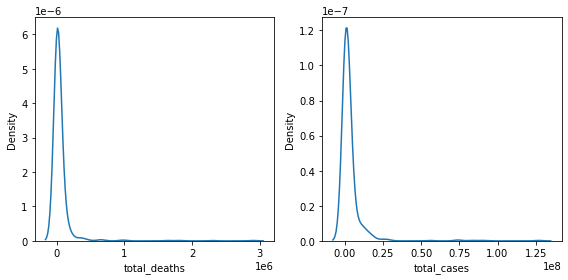

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 4]))
sns.kdeplot(deaths_total['total_deaths'], ax=axs[0])
sns.kdeplot(deaths_total['total_cases'], ax=axs[1])
f.tight_layout()



#ax = sns.joinplot(x="censuscode", y="total_cases", data=dtot,)

In [6]:
dkeys_dict[94]  = 'delhi'
dkeys_dict[519] = 'mumbai'

In [7]:
#sorts by 10 most affected districts
dh_cases = deaths_total.sort_values(by=['total_cases'],ascending = False).head(10)
dh_deaths = deaths_total.sort_values(by=['total_deaths'],ascending = False).head(10)

#merges databases
df_merge = pd.merge(dh_deaths, dh_cases, how='outer').set_index('censuscode')

df_dc = df_merge.join(dkeys)

df_dc


,total_cases,total_deaths,district
censuscode,,,
519,7.466528e+07,2.887546e+06,NaN
94,1.270969e+08,2.288456e+06,NaN
521,8.983572e+07,1.791807e+06,pune
517,7.371049e+07,1.626255e+06,thane
603,5.529837e+07,9.954970e+05,chennai
572,8.309565e+07,9.585020e+05,NaN
505,2.922403e+07,6.800170e+05,nagpur
342,2.492851e+07,6.465220e+05,kolkata
474,1.440694e+07,6.273486e+05,NaN


In [8]:
deaths_total = deaths_total.merge(demog_frame[['censuscode','pc11_pca_tot_p']])
deaths_total = deaths_total.rename({'pc11_pca_tot_p':'population'}, axis=1)
deaths_total

,censuscode,total_cases,total_deaths,population
0,1,1202840.0,20388.0,870354.0
1,2,1614414.0,25240.0,753745.0
2,3,1401315.0,14638.0,133487.0
3,4,508224.0,9312.0,140802.0
4,5,517956.0,4809.0,476835.0
...,...,...,...,...
605,635,6719313.0,115193.0,950289.0
606,636,332122.0,1586.0,41816.0
607,637,803987.0,13175.0,200222.0
608,639,31.0,0.0,105597.0


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [4]:
champion

,censuscode,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
0,1.0,kupwara,jammu kashmir,1.0,439654.0,1312.16980,20475.000000,0.120329,870354.0,663.293700,NaN,NaN,NaN,23.130876,6057.0,98.0,11.259786,695.923728,1312.169858
1,2.0,badgam,jammu kashmir,1.0,335649.0,1051.99630,37610.903809,0.129901,753745.0,716.490110,NaN,NaN,NaN,22.392261,8678.0,123.0,16.318516,1151.317753,1051.996377
2,3.0,leh ladakh,jammu kashmir,1.0,93770.0,338.88980,7763.000000,0.342138,133487.0,393.894990,NaN,NaN,NaN,29.451669,8705.0,87.0,65.174886,6521.234277,338.889814
3,4.0,kargil,jammu kashmir,1.0,86236.0,745.93884,0.000000,0.116035,140802.0,188.758100,NaN,NaN,NaN,24.916550,2200.0,44.0,31.249556,1562.477806,745.938850
4,5.0,punch,jammu kashmir,1.0,261724.0,414.76535,0.000000,0.081013,476835.0,1149.650000,NaN,NaN,NaN,23.933174,2589.0,27.0,5.662336,542.955110,414.765363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,635.0,puducherry,puducherry,34.0,726649.0,3233.95390,82374.000000,0.691589,950289.0,293.847410,5.0,1073.12680,54.580341,NaN,35037.0,558.0,58.718979,3686.983644,3233.953976
636,637.0,karaikal,puducherry,34.0,154916.0,1251.77480,26890.000000,0.489966,200222.0,159.950500,NaN,151.35823,23.850254,NaN,5231.0,80.0,39.955649,2612.600014,1251.774768
637,638.0,nicobars,andaman nicobar islands,35.0,25332.0,527.01520,0.000000,0.000000,36842.0,69.906898,0.0,218.62912,12.533057,NaN,NaN,NaN,NaN,NaN,527.015231
638,639.0,north middle andaman,andaman nicobar islands,35.0,78683.0,258.90808,0.000000,0.025957,105597.0,407.855190,0.0,444.58643,20.856722,NaN,0.0,0.0,0.000000,0.000000,258.908070


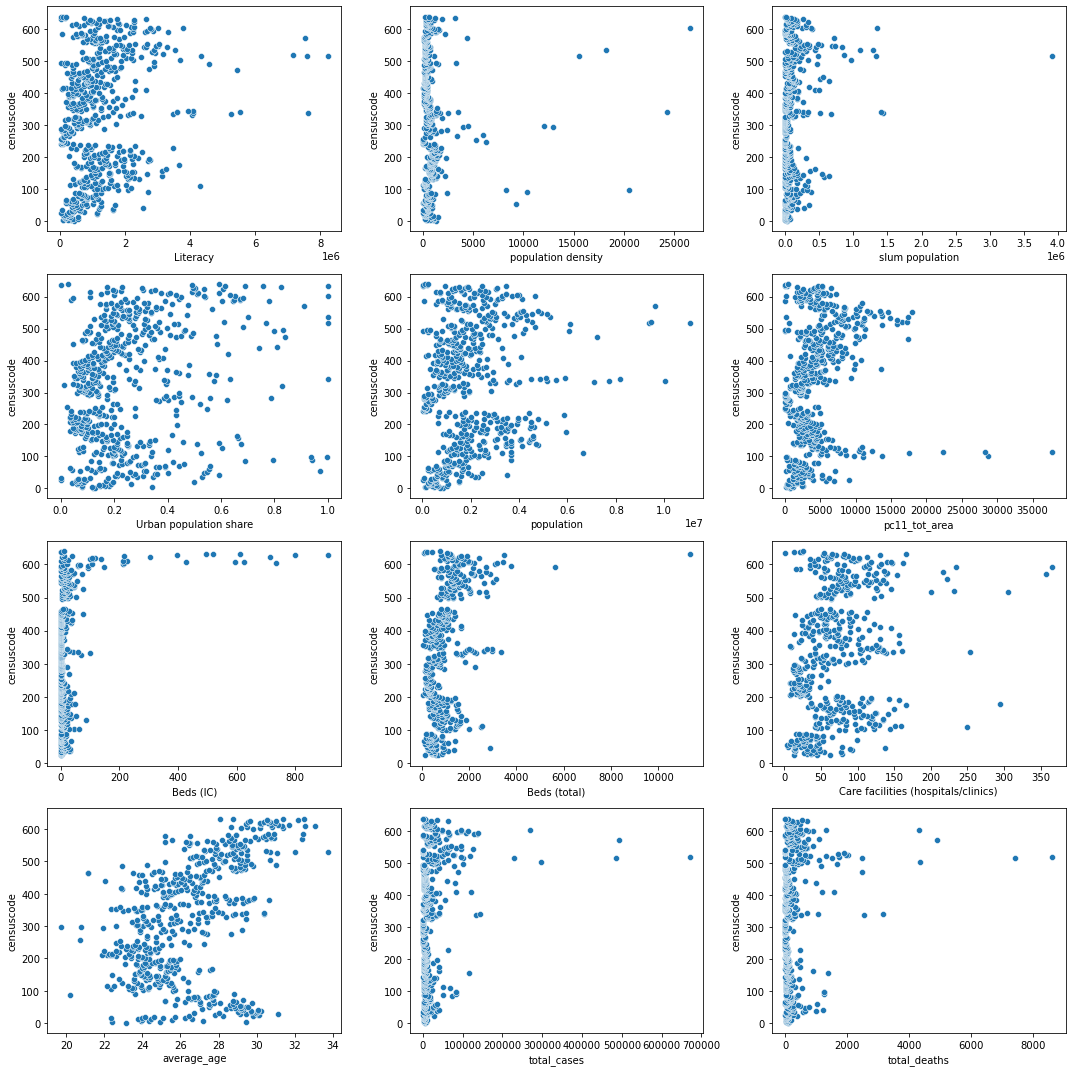

In [31]:
f, axs = plt.subplots(4, 3, figsize=(15, 15), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.scatterplot(data = champion, y = 'censuscode', x = col, ax=axs[i])
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
f.tight_layout()

Text(0.5, 1.0, 'Literacy')

Text(0.5, 1.0, 'population density')

Text(0.5, 1.0, 'slum population')

Text(0.5, 1.0, 'Urban population share')

Text(0.5, 1.0, 'population')

Text(0.5, 1.0, 'pc11_tot_area')

Text(0.5, 1.0, 'Beds (IC)')

Text(0.5, 1.0, 'Beds (total)')

Text(0.5, 1.0, 'Care facilities (hospitals/clinics)')

Text(0.5, 1.0, 'average_age')

Text(0.5, 1.0, 'total_cases')

Text(0.5, 1.0, 'total_deaths')

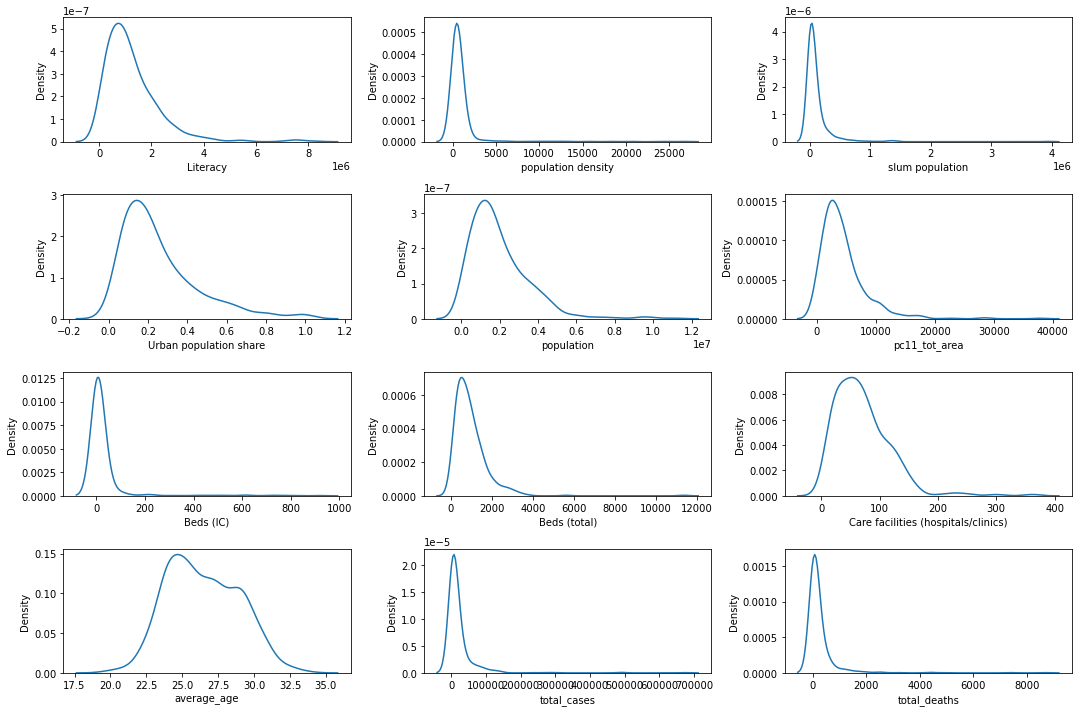

In [18]:
f, axs = plt.subplots(4, 3, figsize=(15, 10), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.kdeplot(champion[col], ax=axs[i])
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
f.tight_layout()

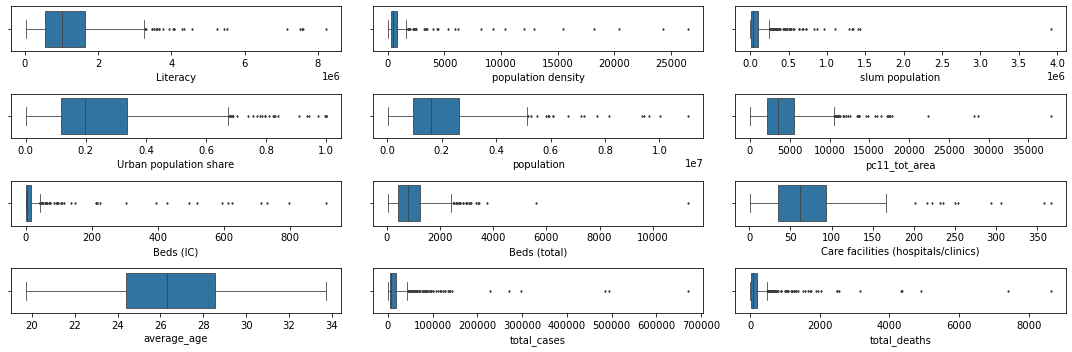

In [16]:
f, axs = plt.subplots(4, 3, figsize=(15, 5), gridspec_kw=dict(width_ratios=[4, 4, 4]))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    plot = sns.boxplot(data = champion, x = col, ax=axs[i],fliersize=1.5, linewidth = 0.8)
f.tight_layout()